<h2 style='color:blue' align='left'> NLP Individual Project (hrs220002)</h2>

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:blue"> Data Preprocessing</h4>

In [16]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [17]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [18]:
y_train.shape

(50000, 1)

In [19]:
# Reshaping and flattening the training dataset

In [20]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [21]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [22]:
y_test = y_test.reshape(-1,)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [27]:
# Visualizing images and displaying images
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

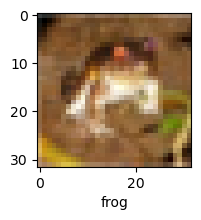

In [28]:
plot_sample(X_train, y_train, 0)

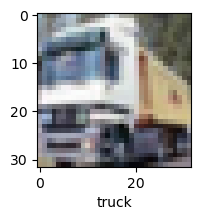

In [29]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [30]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network (ANN)for image classification</h4>

In [31]:
from keras import models
from keras import layers

# Constructing the neural network using Sequential model
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flatten layer to convert 32x32x3 input images to 1D array
    layers.Dense(3000, activation='relu'),   # Dense hidden layer with 3000 neurons and ReLU activation
    layers.Dense(1000, activation='relu'),   # Dense hidden layer with 1000 neurons and ReLU activation
    layers.Dense(10, activation='softmax')   # Output layer with 10 neurons and softmax activation
])

/Users/hetshah/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Explanation for choices:

- Flatten layer: Converts the 32x32x3 input images into a 1D array.
- Dense layers with ReLU activation: ReLU is chosen as it has been found to work well in deep neural networks,promoting faster convergence and avoiding the vanishing gradient problem.
- Softmax activation in the output layer: Since this is a multi-class classification problem (10 classes in CIFAR-10),softmax outputs probabilities of each class, ensuring the sum of probabilities for all classes equals 1, which is desirable for classification tasks.

<h4 style="color:purple">Compiling the model</h4>

In [32]:
# Compile the model with SGD optimizer, sparse categorical crossentropy loss, and accuracy metric
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


Discussion of chosen configurations:
- Optimizer: SGD (Stochastic Gradient Descent) is a widely used optimizer for training neural networks.
- Loss function: Sparse categorical crossentropy is suitable for multi-class classification tasks with integer-encoded labels.
- Metrics: Using 'accuracy' as a metric to monitor the performance of the model during training.

## Training the model

In [33]:
# Define batch size
batch_size = 128

# Train the model with defined epochs (20) and batch size
history = ann.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.1)

# Justification of validation split:
# - Using a validation split allows us to monitor the model's performance on unseen data (10% of the training set)
#   during training, helping to detect overfitting and providing insights into the model's generalization ability.


Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.2644 - loss: 2.0410 - val_accuracy: 0.3450 - val_loss: 1.8708
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.3791 - loss: 1.7835 - val_accuracy: 0.3754 - val_loss: 1.7571
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.4054 - loss: 1.7094 - val_accuracy: 0.4110 - val_loss: 1.7073
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.4249 - loss: 1.6548 - val_accuracy: 0.4342 - val_loss: 1.6448
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.4337 - loss: 1.6128 - val_accuracy: 0.4256 - val_loss: 1.6369
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.4489 - loss: 1.5766 - val_accuracy: 0.4310 - val_loss: 1.6313
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.4601 - loss: 1.5580 - val_accuracy: 0.4320 - val_loss: 1.6176
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.4675 - loss: 1.5282 - 

In [37]:
# Model Evaluation

In [34]:
# Evaluate the model using the test dataset
test_loss, test_accuracy = ann.evaluate(X_test, y_test)

# Report and interpret the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5030 - loss: 1.3919
Test Loss: 1.3973270654678345
Test Accuracy: 0.5033000111579895


In [38]:
# Visualization of Training Progress

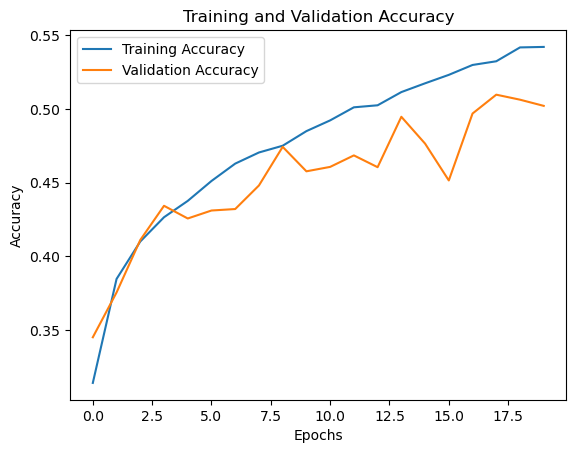

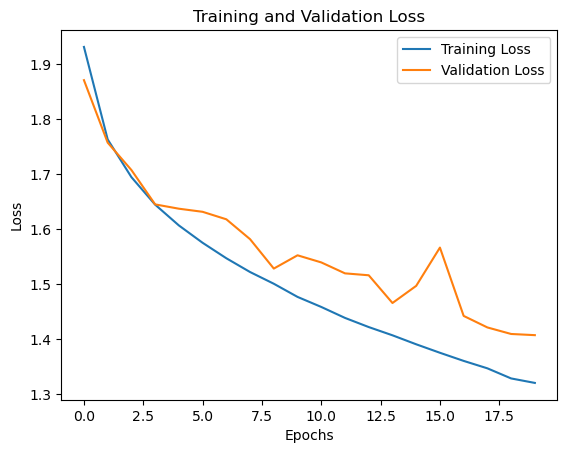

In [35]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Making Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


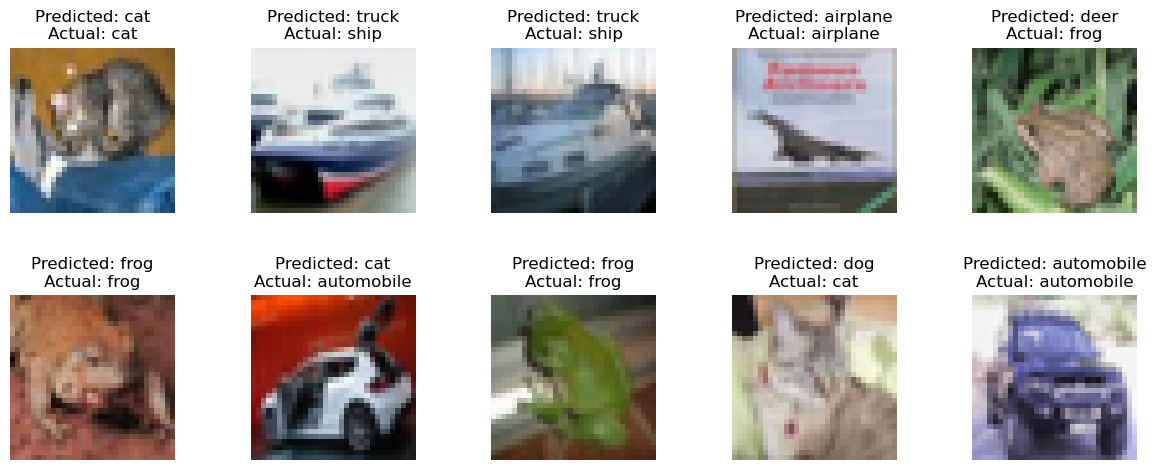

Accuracy of Predictions vs Actual Labels: 0.5033


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on new data
predictions = ann.predict(X_test)

# Convert predictions from one-hot encoded format to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels for CIFAR-10 dataset
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Flatten y_test if necessary
y_test = np.squeeze(y_test)

# Visualize a random sample of predictions versus actual labels
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_labels[predicted_labels[i]]}\nActual: {class_labels[y_test[i]]}")
    plt.axis('off')
    if (i + 1) % 4 == 0:  # Start a new row after every 4 images
        plt.subplots_adjust(hspace=0.5)  # Add some space between rows

plt.show()

# Calculate accuracy of predictions versus actual labels
accuracy = np.mean(predicted_labels == y_test)
print("Accuracy of Predictions vs Actual Labels:", accuracy)


Key Learnings:

- The model appears to be trained on the CIFAR-10 dataset, which consists of 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

- The model is making predictions on test images, and the accuracy score of 0.5033 (or 50.33%) suggests that there is room for improvement in the model's performance.

- The model seems to struggle with distinguishing between certain classes, such as confusing an airplane with a horse, and an automobile with a truck.

Potential Improvements:

- Data Augmentation: Increasing the diversity and volume of the training data through techniques like image augmentation (flipping, rotating, cropping, etc.) can help the model generalize better and improve its performance.

- Model Architecture: CNN's are best for image classification and gives superb accuracy.  With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features.

- Transfer Learning: Instead of training the model from scratch, leveraging pre-trained models on larger datasets (e.g., ImageNet) and fine-tuning them on the CIFAR-10 dataset could lead to better performance, especially if the training data is limited.

- Hyperparameter Tuning: Optimizing hyperparameters like learning rate, batch size, and regularization techniques through techniques like grid search or random search could help improve the model's generalization and prevent overfitting.


Real-world Applicability:

While the CIFAR-10 dataset is widely used for benchmarking and research purposes, its limited number of classes and small image resolution (32x32 pixels) may not fully represent the complexity of real-world applications. However, the underlying principles and techniques used in this model can be extended to more practical scenarios, such as:

- Object Detection and Recognition: Similar models can be used for detecting and recognizing objects in images or videos, which has applications in areas like autonomous vehicles, surveillance, and robotics.

- Image Classification: With appropriate fine-tuning and adaptation, these models can be employed in various industries for tasks like product categorization, medical image analysis, and content moderation.

- Transfer Learning: The model's weights, trained on the CIFAR-10 dataset, could potentially be used as a starting point (through transfer learning) for training on more complex datasets or for other computer vision tasks.

It's important to note that for real-world applications, factors like model performance, resource constraints, and domain-specific requirements should be carefully considered before deploying such models in production environments.